<a href="https://colab.research.google.com/github/AEinstein86/OyatsiA/blob/main/DSA_8203_(Alexander_Oyatsi_134000)_Final_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [4]:
#Reading the CSV File.
pd.options.display.max_columns=None
url='https://raw.githubusercontent.com/AEinstein86/OyatsiA/main/Train_v2.csv'
Fp=pd.read_csv(url)
Fp.head(2)


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent


In [5]:
# Dataset Shape
Fp.shape

(23524, 13)

In [6]:
# Summary Statistics 
Fp.describe(include="all")

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524.000000,23524,23524,23524,23524,23524.000000,23524.000000,23524,23524,23524,23524,23524
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,6,10
top,Rwanda,NaN,uniqueid_1,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20212,14343,17454,NaN,NaN,13877,12831,10749,12791,6437
mean,NaN,2016.975939,NaN,NaN,NaN,NaN,3.797483,38.805220,NaN,NaN,NaN,NaN,NaN
std,NaN,0.847371,NaN,NaN,NaN,NaN,2.227613,16.520569,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,1.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [7]:
#Dataset Columns
Fp.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [8]:
#Cleaning the data.No missing values in the dataset.
Fp.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [9]:
#Relationship Analysis
correlation = Fp.corr()

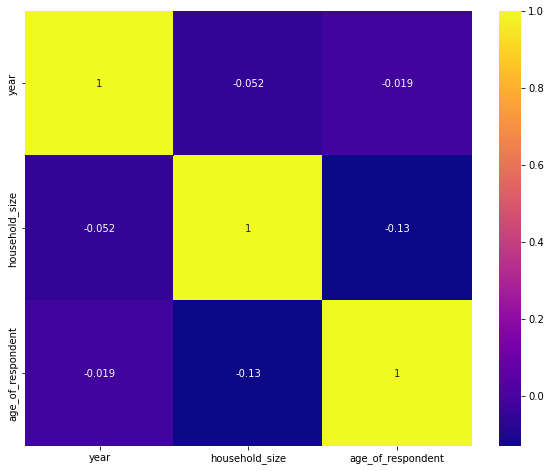

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True,cmap="plasma");
#plt.savefig("Heatmap.png")

Analysis

In [11]:
# From the output,we can deduce that 3,312 people have bank account and 20,212 people do no have bank accounts.
Fp['bank_account'].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

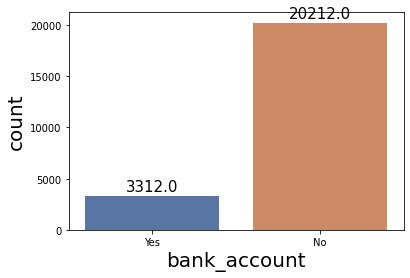

In [12]:
#bar graph illustrating the above information.use plt.savefig("name.png") at the bottom to save the figure.
#The data shows that we have a larger number of no class than yes class in our target variable, which means a majority of people don't have bank accounts.
splot=sns.countplot(x ='bank_account', data = Fp,palette='deep')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.xlabel("bank_account",fontsize=20)
plt.ylabel("count",fontsize=20);

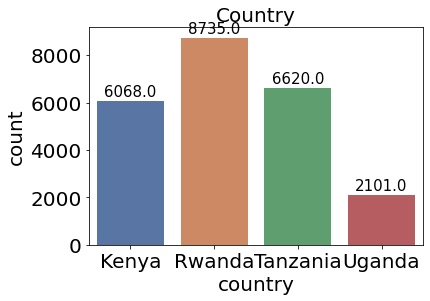

In [13]:
#The country feature in the above graph shows that most of the data was collected in Rwanda (8,735) and the least data was collected in Uganda(2101).
#Use the savefig function plt.savefig("name.png")
splot=sns.countplot(x ='country', data = Fp,palette='deep')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.xlabel("country",fontsize=20)
plt.title("Country",fontsize=20)
plt.ylabel("count",fontsize=20);

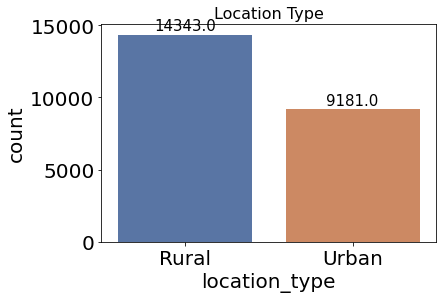

In [14]:
splot=sns.countplot(x ='location_type', data = Fp,palette='deep')
#we have a larger number of people living in rural areas than in urban areas.
#remamber to savefig.
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.title("Location Type",fontsize=16)
plt.xlabel("location_type",fontsize=20)
plt.ylabel("count",fontsize=20);

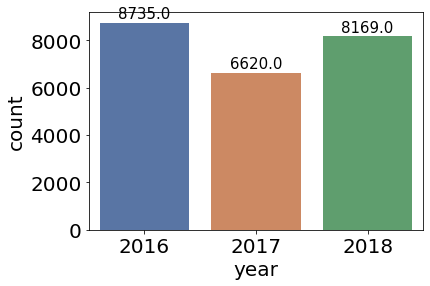

In [15]:
#most of the data was collected in 2016 (8735 samples)
splot=sns.countplot(x ='year', data = Fp,palette='deep')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.xlabel("year",fontsize=20)
plt.ylabel("count",fontsize=20);

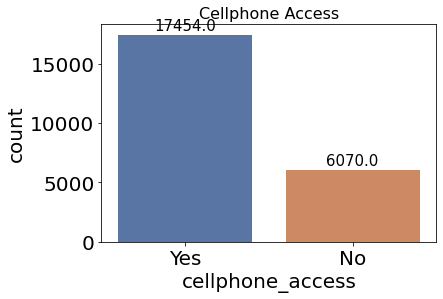

In [16]:
#most of the participants have access to a cellphone as depicted in the graph below.(17454 people had access to a cellphone).
splot=sns.countplot(x ='cellphone_access', data = Fp,palette='deep')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.title("Cellphone Access",fontsize=16)
plt.xlabel("cellphone_access",fontsize=20)
plt.ylabel("count",fontsize=20);


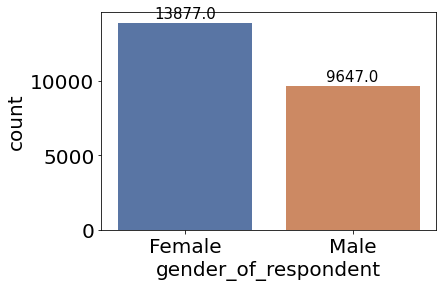

In [17]:
#we have more females than males.
splot=sns.countplot(x ='gender_of_respondent', data = Fp,palette='deep')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.xlabel("gender_of_respondent",fontsize=20)
plt.ylabel("count",fontsize=20);


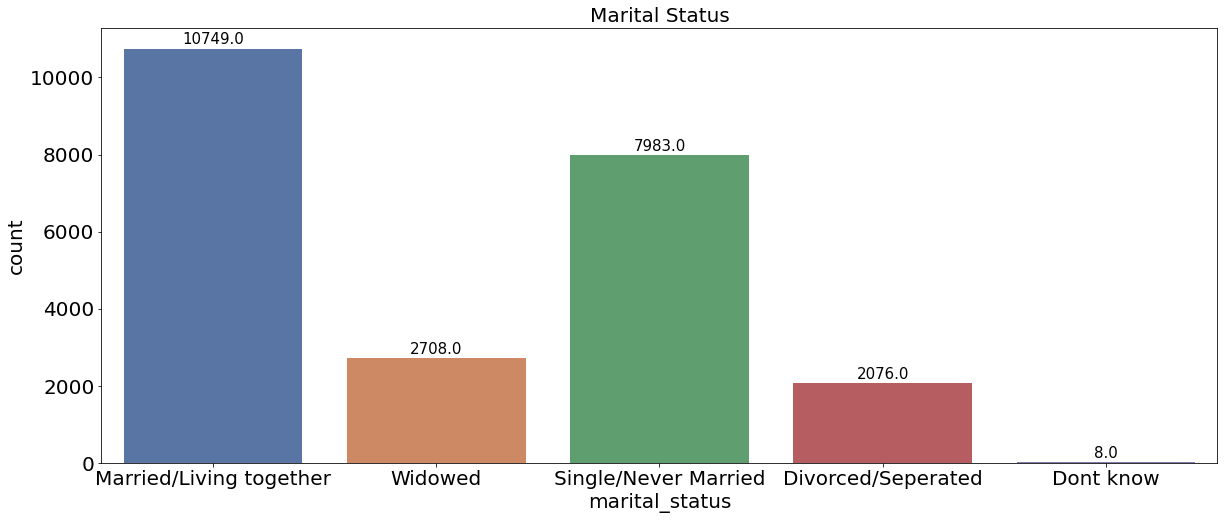

In [18]:
#most of the participants are married/living together.
fig = plt.figure(figsize=(20,8))
splot=sns.countplot(x ='marital_status', data = Fp,palette='deep')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.title("Marital Status",fontsize=20)
plt.xlabel("marital_status",fontsize=20)
plt.ylabel("count",fontsize=20);


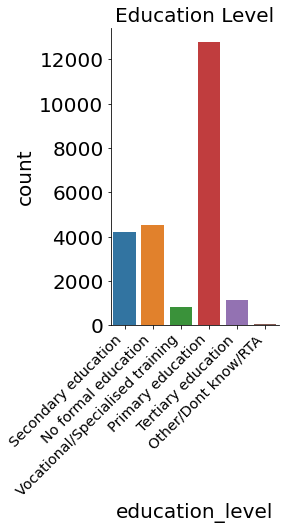

In [19]:
#most of the participants have a primary level of education.
#remember use the savefig function.
sns.catplot(x="education_level", kind="count", data=Fp);  

plt.xticks( 
           rotation=45,  
           horizontalalignment='right', 
           fontweight='light', 
           fontsize='x-large' 
)
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.title("Education Level",fontsize=20)
plt.xlabel("education_level",fontsize=20)
plt.ylabel("count",fontsize=20);

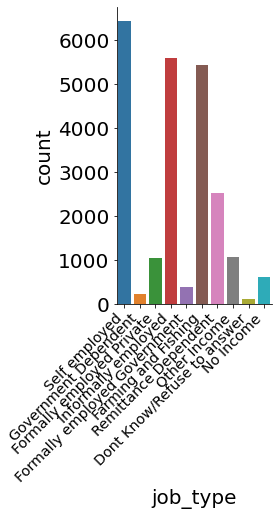

In [20]:
#most of the participants are self-employed.
sns.catplot(x="job_type", kind="count", data=Fp);  

plt.xticks( 
rotation=45,  
horizontalalignment='right', 
fontweight='light', 
fontsize='x-large' 
)
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.xlabel("job_type",fontsize=20)
plt.ylabel("count",fontsize=20);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


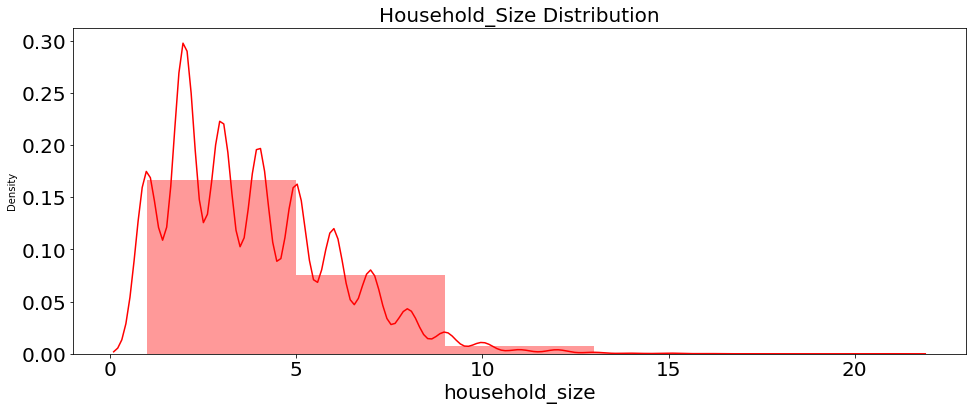

In [21]:
#Explore household_size distribution  
plt.figure(figsize=(16, 6))
plt.xlabel("Household Size",fontsize=20)
plt.title("Household_Size Distribution",fontsize=20)
sns.distplot(Fp["household_size"],color="r",bins=5);

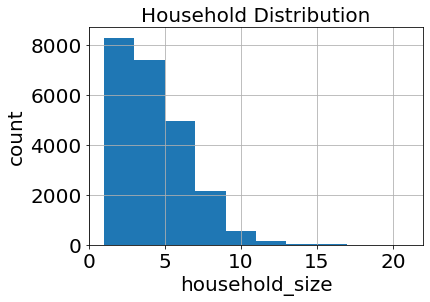

In [22]:
#Household Size Distribution.
#Household_size is not normally distributed and the most common number of people living in the house is 2.
Fp.household_size.hist() 
plt.xlabel('household_size')
plt.ylabel("count",fontsize=20)
plt.title("Household Distribution",fontsize=20)
plt.xlabel("household_size",fontsize=20);

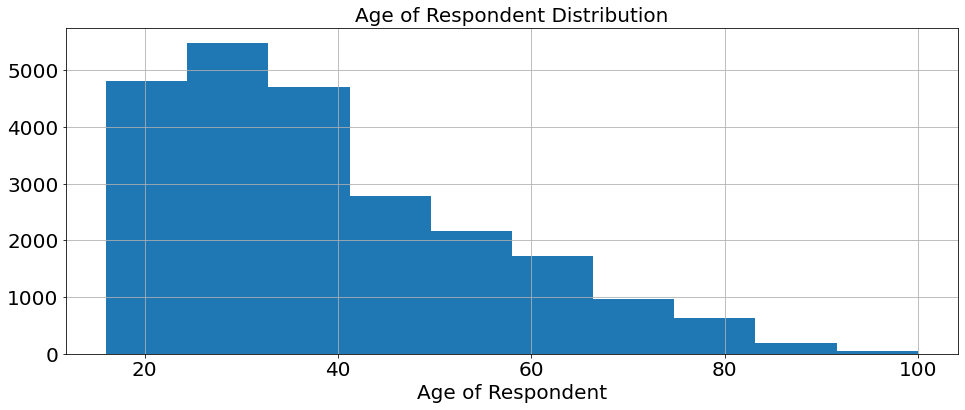

In [23]:
#Explore age_of_respondent distribution.Most of the participants are between 25 and 35 years old. 

plt.figure(figsize=(16, 6))
Fp.age_of_respondent.hist() 
plt.title("Age of Respondent Distribution",fontsize=20)
plt.xlabel('Age of Respondent',fontsize=20);

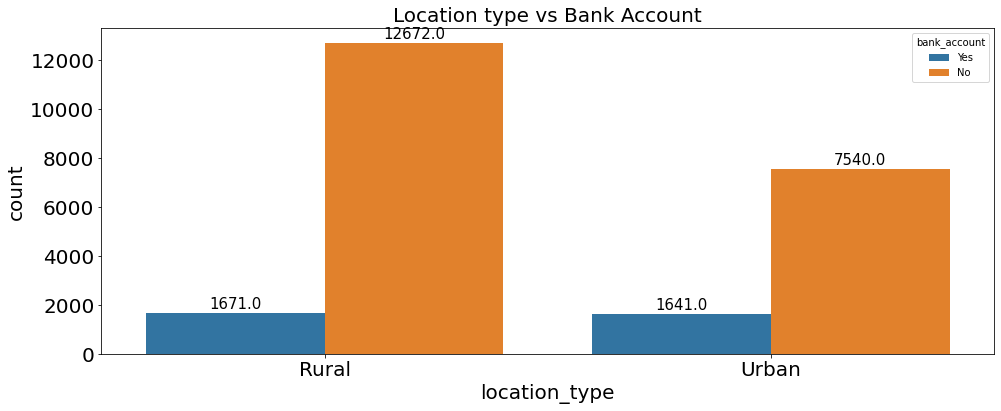

In [24]:
#Explore location type  vs bank account  
#you can see that the majority of people living in rural areas don't have bank accounts. 
plt.figure(figsize=(16, 6))
splot=sns.countplot(x='location_type', hue= 'bank_account', data=Fp)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.title("Location type vs Bank Account",fontsize=20)
plt.xlabel("location_type",fontsize=20)
plt.ylabel("count",fontsize=20);

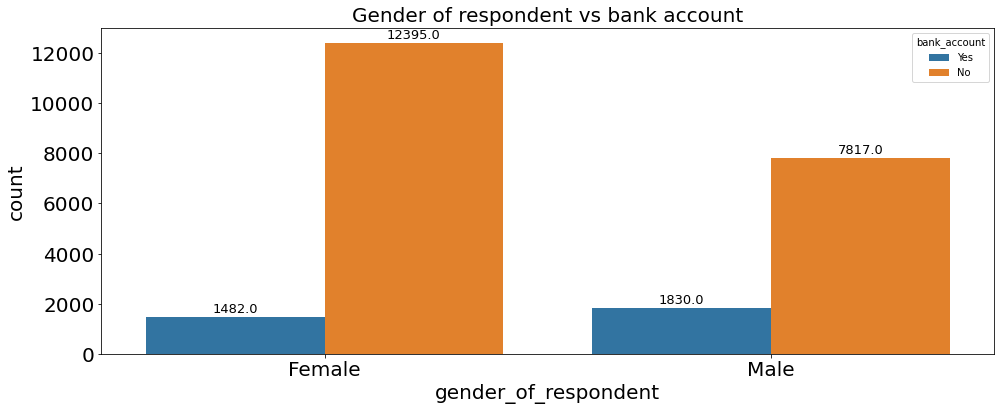

In [25]:
#Explore gender_of_respondent vs bank account.
#The plot shows that there is a small difference between males and females who have bank accounts (The number of males are greater than females). 
plt.figure(figsize=(16, 6))
splot=sns.countplot(x='gender_of_respondent', hue= 'bank_account', data=Fp)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13,
                   xytext = (0,8), 
                   textcoords = 'offset points')
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.title("Gender of respondent vs bank account",fontsize=20)
plt.xlabel("gender_of_respondent",fontsize=20)
plt.ylabel("count",fontsize=20);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


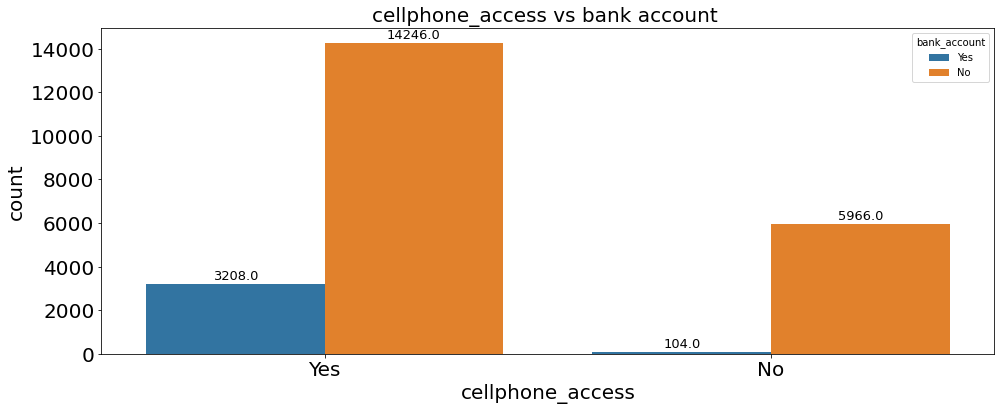

In [26]:
#Explore cellphone_access vs bank account  

plt.figure(figsize=(16, 6))
splot=sns.countplot('cellphone_access', hue= 'bank_account', data=Fp)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13,
                   xytext = (0,8), 
                   textcoords = 'offset points')
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.title("cellphone_access vs bank account ",fontsize=20)
plt.xlabel("cellphone_access",fontsize=20)
plt.ylabel("count",fontsize=20);

The cellphone_access plot shows the majority of people who have cellphone access, don't have bank accounts. This proved that people who have access to cellphone have a lower chance to use bank accounts. One of the reasons is the availability of mobile money services which is more accessible and affordable especially for people living in rural areas.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


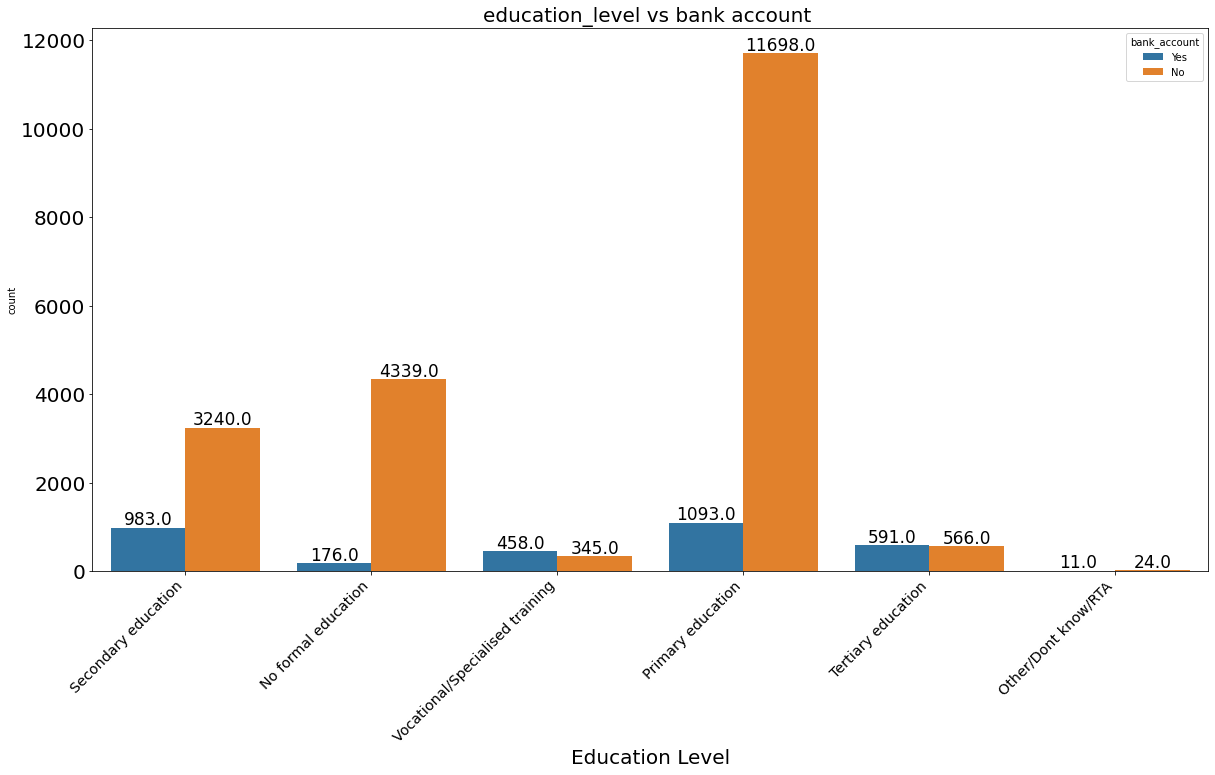

In [27]:
#Explore education_level vs bank account.
#The education_level plot shows that the majority of people have primary education and most of them don't have bank accounts. This also proves our assumption that people with lower education have a lower chance to have bank accounts.
plt.figure(figsize=(20,10))
splot=sns.countplot('education_level', hue= 'bank_account', data=Fp)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=17,
                   xytext = (0,8), 
                   textcoords = 'offset points')
plt.title("education_level vs bank account ",fontsize=20)
plt.xlabel("Education Level",fontsize=20)
plt.xticks( 
    rotation=45,  
    horizontalalignment='right', 
    fontweight='light', 
    fontsize='x-large' 
);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


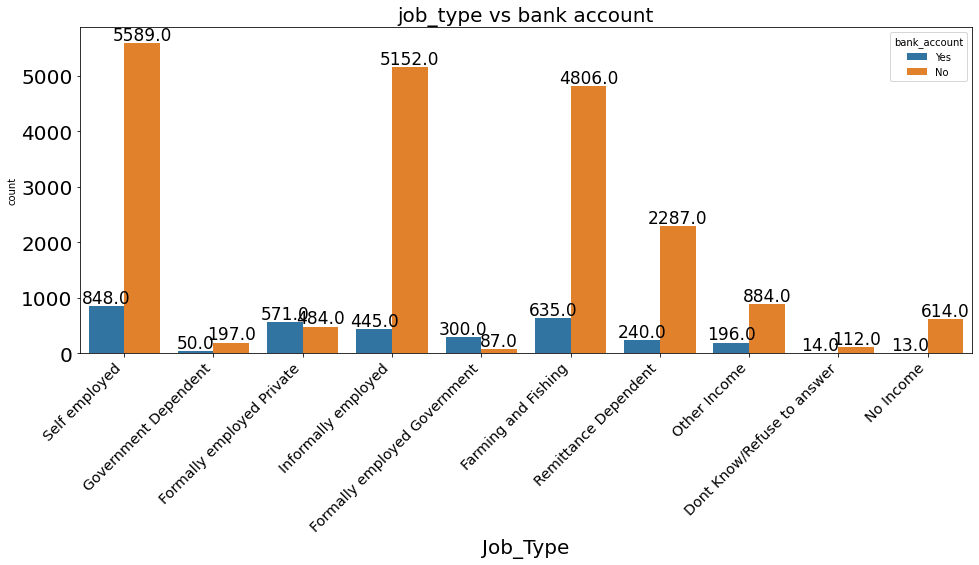

In [28]:
#Explore job_type vs bank account  

plt.figure(figsize=(16, 6))
splot=sns.countplot('job_type', hue= 'bank_account', data=Fp)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=17,
                   xytext = (0,8), 
                   textcoords = 'offset points')
plt.title("job_type vs bank account",fontsize=20)
plt.xlabel("Job_Type",fontsize=20)
plt.xticks( 
    rotation=45,  
    horizontalalignment='right', 
    fontweight='light', 
    fontsize='x-large' 
);

The majority of people who are self-employed don't have access to the bank accounts, followed by informally employed and farming and fishing.